# Model K-prototypes

This Jupyter notebook is used to:

1. Run K-prototypes.
2. Visualize results.

## 0. Load the data

In [1]:
import pandas as pd
import os

# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'final.csv'
print(INPUT_CSV)

data = pd.read_csv(INPUT_CSV, low_memory=False)
selected_df = data.copy()
selected_df.head(5)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_xss/final.csv


,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,...,r_ip_bytes,connection.resp_pkts.1,protocol,service,conn_state,orig_p_cat,resp_p_cat,attacker_label,victim_label,timestamp
0,1.00000,0.26932,0.21762,0.00011,0.75045,0.00625,0.00004,0.00001,0.00675,0.00000,...,3694,9,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-06T12:06:35.060859Z
1,1.00000,0.84205,0.21874,0.02370,0.75054,0.00932,0.00007,0.00002,0.00675,0.00000,...,4812,12,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-06T12:06:37.071614Z
2,1.00000,0.74843,0.17379,0.00000,0.75051,0.00000,0.00000,0.00000,0.00208,0.00000,...,180,2,udp,dns,SHR,orig_reg_or_dyn,resp_well_known,No,Yes,2017-07-06T12:05:16.358339Z
3,1.00000,0.74843,0.15288,0.00000,0.75027,0.00084,0.00001,0.00000,0.00592,0.00000,...,382,2,udp,none,SF,orig_reg_or_dyn,resp_well_known,No,No,2017-07-06T12:04:38.814779Z
4,1.00000,0.74843,0.21762,0.00000,0.81909,0.00034,0.00000,0.00000,0.00079,0.00000,...,540,2,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-06T12:06:35.056945Z


In [2]:
# shuffle 
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df.head(5)

,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,...,r_ip_bytes,connection.resp_pkts.1,protocol,service,conn_state,orig_p_cat,resp_p_cat,attacker_label,victim_label,timestamp
0,1.00000,0.07765,0.37105,0.09062,0.55712,0.00639,0.00007,0.00003,0.00675,0.00001,...,31091,34,tcp,ssl,RSTR,orig_reg_or_dyn,resp_443,No,No,2017-07-06T12:11:10.551417Z
1,1.00000,0.45909,0.99988,0.00019,0.61941,0.00146,0.00001,0.00000,0.00121,0.00000,...,52,1,tcp,http,S1,orig_reg_or_dyn,resp_80,No,No,2017-07-06T12:29:59.651832Z
2,0.00000,0.74843,0.86406,0.00405,0.74096,0.00000,0.00001,0.00000,0.00121,0.00000,...,112,2,tcp,none,SF,orig_reg_or_dyn,resp_80,Yes,Yes,2017-07-06T12:25:55.785953Z
3,1.00000,0.74843,0.26392,0.00002,0.91766,0.00036,0.00000,0.00000,0.00079,0.00000,...,186,1,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-06T12:07:58.187423Z
4,1.00000,0.74843,0.59190,0.00000,0.31141,0.00031,0.00000,0.00000,0.00079,0.00000,...,254,2,udp,dns,SF,orig_reg_or_dyn,resp_53,No,Yes,2017-07-06T12:17:47.106245Z


## 1. K-prototypes

(https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb
)

(https://github.com/nicodv/kmodes/blob/master/kmodes/kprototypes.py)

### Parameters of kmodes.kprototypes.KPrototypes: 

```
num_dissim: 
        Dissimilarity function used by the algorithm for numerical variables. 
        (default is euclidian_dissim)
        
cat_dissim: 
        For categorical variables. 
        (default is matching_dissim)
        
init: 
        Initial centroids.
        
gamma: 
        Weighing factor determining relative importance of numerical vs. categorical attributes. 
        (default is None, calculated from data)
        
n_jobs: 
        Number of jobs to use for the computation - each n_init runs in parallel. If -1 all CPUs are used. 
        (default is 1)
```

### Attributes: 

```
cluster_centroids_

labels_:
        Labels of each point (cluster l affiliation)
        
cost_: 
        Sum distance of all points to their respective cluster centroids.

n_iter_:
        The number of iterations the algorithm ran for.

epoch_costs_:
        Cost at each epoch.

gamma:
        The (potentially calculated) weighing factor.
```

In [4]:
import numpy as np
from kmodes.kprototypes import KPrototypes

In [5]:
print('Dimension data: {} rows and {} columns'.format(len(selected_df), len(selected_df.columns)))

Dimension data: 21876 rows and 294 columns


In [6]:
# selected_df.info()

In [7]:
# Inspect the categorical variables
selected_df.select_dtypes('object').nunique()

orig_orig_connection.protocol_mode          3
orig_orig_connection.service_mode           5
orig_orig_connection.conn_state_mode        3
orig_resp_connection.protocol_mode          3
orig_resp_connection.service_mode           6
orig_resp_connection.conn_state_mode        3
resp_orig_connection.protocol_mode          4
resp_orig_connection.service_mode           5
resp_orig_connection.conn_state_mode        3
resp_resp_connection.protocol_mode          2
resp_resp_connection.service_mode           7
resp_resp_connection.conn_state_mode        9
uid                                     21876
originated_ip                              16
responded_ip                             1201
protocol                                    3
service                                    15
conn_state                                 10
orig_p_cat                                  2
resp_p_cat                                  9
attacker_label                              2
victim_label                      

In [8]:
# Numerical
pd.set_option('display.max_columns', None)
selected_df.describe()

,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_ip_bytes,connection.resp_pkts,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_cipher_count,resp_orig_similar_ssl_curve_count,resp_orig_similar_ssl_validation_status_count,resp_orig_similar_files_source_count,resp_orig_similar_file_md5_count,resp_resp_total,resp_resp_connection.time_mean,resp_resp_connect

In [9]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       #'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       #'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

# categorical
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [10]:
def load_col_names(list_name, file_path):
    f = open(file_path, 'r')
    for ohe_col in f:
        list_name.append(ohe_col.strip())
    f.close()
    # print(list_name)

In [ ]:
OHE_PROTO_CAT_COLS = []
OHE_SERVICE_CAT_COLS = []
OHE_CONN_STATE_CAT_COLS = []
ORIG_ORIG_OHE_CAT_COLS = []
ORIG_RESP_OHE_CAT_COLS = []
RESP_ORIG_OHE_CAT_COLS = []
RESP_RESP_OHE_CAT_COLS = []

load_col_names(OHE_PROTO_CAT_COLS,  PREFIX_PATH + 'ohe_proto_cat_cols.txt')
load_col_names(OHE_SERVICE_CAT_COLS,  PREFIX_PATH + 'ohe_service_cat_cols.txt')
load_col_names(OHE_CONN_STATE_CAT_COLS,  PREFIX_PATH + 'ohe_conn_state_cat_cols.txt')
load_col_names(ORIG_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'orig_orig_categorical_cols.txt')
load_col_names(ORIG_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'orig_resp_categorical_cols.txt')
load_col_names(RESP_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'resp_orig_categorical_cols.txt')
load_col_names(RESP_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'resp_resp_categorical_cols.txt')

In [12]:
df = selected_df.filter(CONN_NUMERICAL_COLS + 
                        # categorical
                        ['orig_p_cat', 
                         'resp_p_cat',
                         'protocol',
                         'service', 
                         'conn_state'] + 
                        CONN_APP_STATS + 
                        
                        # originator neighbourhood
                        ORIG_ORIG_NUMERICAL_COLS + 
                        ORIG_ORIG_PORTS_COLS + 
                        ORIG_ORIG_APP_STATS_COLS + 
                        ORIG_ORIG_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        ORIG_ORIG_CATEGORICAL_COLS + 
                        
                        # originator neighbourhood
                        ORIG_RESP_NUMERICAL_COLS + 
                        ORIG_RESP_PORTS_COLS + 
                        ORIG_RESP_APP_STATS_COLS + 
                        ORIG_RESP_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        ORIG_RESP_CATEGORICAL_COLS + 
                        
                        # originator neighbourhood
                        RESP_ORIG_NUMERICAL_COLS + 
                        RESP_ORIG_PORTS_COLS + 
                        RESP_ORIG_APP_STATS_COLS + 
                        RESP_ORIG_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        RESP_ORIG_CATEGORICAL_COLS + 
                        
                        # originator neighbourhood
                        RESP_RESP_NUMERICAL_COLS + 
                        RESP_RESP_PORTS_COLS + 
                        RESP_RESP_APP_STATS_COLS + 
                        RESP_RESP_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        RESP_RESP_CATEGORICAL_COLS, axis=1)

In [13]:
df.head()

,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_pkts,orig_p_cat,resp_p_cat,protocol,service,conn_state,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_orig_connection.protocol_mode,orig_orig_connection.service_mode,orig_orig_connection.conn_state_mode,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,orig_resp_connection.protocol_mode,orig_resp_connection.service_mode,orig_resp_connection.conn_state_mode,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_cipher_count,resp_orig_similar_ssl_curve_count,res

In [14]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'orig_p_cat',
       'resp_p_cat',
       ...
       'resp_resp_similar_http_user_agent_count',
       'resp_resp_similar_ssl_version_count',
       'resp_resp_similar_ssl_cipher_count',
       'resp_resp_similar_ssl_curve_count',
       'resp_resp_similar_ssl_validation_status_count',
       'resp_resp_similar_files_source_count',
       'resp_resp_similar_file_md5_count',
       'resp_resp_connection.protocol_mode',
       'resp_resp_connection.service_mode',
       'resp_resp_connection.conn_state_mode'],
      dtype='object', length=182)

In [15]:
# Get the position of categorical columns
cat_cols_i_list = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns         : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns indexes : {}'.format(cat_cols_i_list))

Categorical columns         : ['orig_p_cat', 'resp_p_cat', 'protocol', 'service', 'conn_state', 'orig_orig_connection.protocol_mode', 'orig_orig_connection.service_mode', 'orig_orig_connection.conn_state_mode', 'orig_resp_connection.protocol_mode', 'orig_resp_connection.service_mode', 'orig_resp_connection.conn_state_mode', 'resp_orig_connection.protocol_mode', 'resp_orig_connection.service_mode', 'resp_orig_connection.conn_state_mode', 'resp_resp_connection.protocol_mode', 'resp_resp_connection.service_mode', 'resp_resp_connection.conn_state_mode']
Categorical columns indexes : [8, 9, 10, 11, 12, 56, 57, 58, 97, 98, 99, 138, 139, 140, 179, 180, 181]


In [16]:
# Convert dataframe to matrix
df_matrix = df.to_numpy()
df_matrix

array([[0.3710515668252981, 0.0906176634570729, 0.5571188768502976, ...,
        'tcp', 'ssl', 'RSTR'],
       [0.9998776054646116, 0.0001854337381807, 0.6194109568136731, ...,
        'tcp', 'http', 'S1'],
       [0.8640622141568031, 0.0040470645956231, 0.7409583396917442, ...,
        'tcp', 'none', 'SF'],
       ...,
       [0.9881083989187158, 0.000104837666315, 0.945780558522814, ...,
        'udp', 'dns', 'SF'],
       [0.5040727693096965, 1.41894492723324e-07, 0.8526171219288875,
        ..., 'udp', 'dns', 'SF'],
       [0.9708303870480484, 2.4653396944592995e-05, 0.5888295437204334,
        ..., 'udp', 'dns', 'SF']], dtype=object)

In [17]:
from datetime import datetime

# Choose optimal K using Elbow method
cost = []
print_info = []
computed_clusters = []

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
for cluster in range(1, 8):
    try:
        kprototype = KPrototypes(n_jobs=-1, n_clusters=cluster, init='Huang', random_state=0)
        kprototype.fit_predict(X=df_matrix, categorical=cat_cols_i_list)
        computed_clusters.append(kprototype)
        cost.append(kprototype.cost_)
        print_str = 'Cluster initiation: {:2} ({}), gamma: {}'.format(cluster, 
                                                                      datetime.now().strftime("%H:%M:%S"), 
                                                                      kprototype.gamma)
        print_info.append(print_str)
        print(print_str)
    except:
        break
print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 00:52:29.
Cluster initiation:  1 (00:52:44), gamma: 0.11747219852668071
Cluster initiation:  2 (00:53:18), gamma: 0.11747219852668071
Cluster initiation:  3 (00:53:59), gamma: 0.11747219852668071
Cluster initiation:  4 (00:54:56), gamma: 0.11747219852668071
Cluster initiation:  5 (00:56:15), gamma: 0.11747219852668071
Cluster initiation:  6 (00:57:37), gamma: 0.11747219852668071
Cluster initiation:  7 (00:59:26), gamma: 0.11747219852668071
Done at 00:59:26.


In [18]:
print_info

['Cluster initiation:  1 (00:52:44), gamma: 0.11747219852668071',
 'Cluster initiation:  2 (00:53:18), gamma: 0.11747219852668071',
 'Cluster initiation:  3 (00:53:59), gamma: 0.11747219852668071',
 'Cluster initiation:  4 (00:54:56), gamma: 0.11747219852668071',
 'Cluster initiation:  5 (00:56:15), gamma: 0.11747219852668071',
 'Cluster initiation:  6 (00:57:37), gamma: 0.11747219852668071',
 'Cluster initiation:  7 (00:59:26), gamma: 0.11747219852668071']

In [19]:
cost

[113923.96453535226,
 77586.01193784867,
 53838.38014900056,
 47824.53228913131,
 43578.6004320069,
 39634.21599953694,
 36179.12930995235]

In [20]:
#df_cost = pd.DataFrame({'Cluster': range(1, 15), 'Cost': cost})
df_cost = pd.DataFrame({'Cluster': range(1, len(computed_clusters) + 1), 'Cost': cost})

In [21]:
df_cost

,Cluster,Cost
0,1,113923.96454
1,2,77586.01194
2,3,53838.38015
3,4,47824.53229
4,5,43578.60043
5,6,39634.21600
6,7,36179.12931


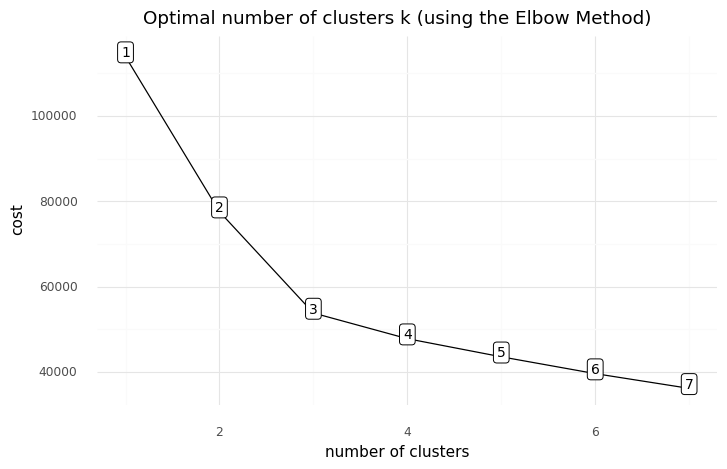

<ggplot: (8746480220543)>

In [22]:
# Import module for data visualization
from plotnine import *
import plotnine

plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of clusters k (using the Elbow Method)')+
    xlab('number of clusters')+
    ylab('cost')+
    theme_minimal()
)

In [23]:
# Fit the cluster
OPTIMAL_K = 2

kprototype = computed_clusters[OPTIMAL_K]

In [24]:
# Cluster centorid
kprototype.cluster_centroids_

array([['0.5803045889796461', '0.0001590252305909072',
        '0.9309920113118183', '0.00030222791803466225',
        '1.1679196610971497e-06', '0.001160142595980527',
        '4.2247932213217457e-08', '7.338930178059478e-07',
        '0.9977027337468413', '0.0', '0.0', '0.0009189065012634965',
        '2.418175003325156e-05', '0.4688714482771418',
        '0.5598155133488832', '0.004419882636506128',
        '0.00017475657041341624', '0.00241507378203626',
        '4.930219052229724e-05', '0.0008528719592815138',
        '0.03327146515751633', '0.46806993330784447',
        '-2.1093217276722795e-15', '0.0', '0.6770907966055597',
        '1.4943393409887268e-15', '0.0023472068238788953',
        '0.005842379188300176', '0.0', '0.10097277343409831',
        '0.3693520500079016', '-8.563229508796147e-17',
        '0.9977435682728161', '-7.428266848657864e-18',
        '-7.865737568388694e-16', '0.001525927780419228',
        '0.0004347733371584101', '0.08522402895010416', '0.0', '0.0',


In [25]:
# Check the iteration of the clusters created
kprototype.n_iter_

3

In [26]:
# Check the cost of the clusters created
kprototype.cost_

53838.38014900056

In [28]:
# Add cluster labels to original dataframe
df['cluster'] = kprototype.labels_
df['cluster_cat'] = df['cluster']

# (groupby works only on category type)
df['cluster_cat'] = df['cluster_cat'].astype('category')

In [29]:
df.head()

,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_pkts,orig_p_cat,resp_p_cat,protocol,service,conn_state,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_orig_connection.protocol_mode,orig_orig_connection.service_mode,orig_orig_connection.conn_state_mode,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,orig_resp_connection.protocol_mode,orig_resp_connection.service_mode,orig_resp_connection.conn_state_mode,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_cipher_count,resp_orig_similar_ssl_curve_count,res

In [30]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'orig_p_cat',
       'resp_p_cat',
       ...
       'resp_resp_similar_ssl_cipher_count',
       'resp_resp_similar_ssl_curve_count',
       'resp_resp_similar_ssl_validation_status_count',
       'resp_resp_similar_files_source_count',
       'resp_resp_similar_file_md5_count',
       'resp_resp_connection.protocol_mode',
       'resp_resp_connection.service_mode',
       'resp_resp_connection.conn_state_mode', 'cluster', 'cluster_cat'],
      dtype='object', length=184)

In [31]:
df['cluster'].value_counts()

2    10154
1     7369
0     4353
Name: cluster, dtype: int64

## 2. Results

In [32]:
# Cluster interpretation
# (using average for numerical, mode for categorical attributes)

#df.rename(columns = {'cluster':'Total'}, inplace = True)
df.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        'protocol': lambda x: x.value_counts().index[0],
        'service': lambda x: x.value_counts().index[0],
        'conn_state': lambda x: x.value_counts().index[0],
        'orig_p_cat' : lambda x: x.value_counts().index[0],
        'resp_p_cat': lambda x: x.value_counts().index[0],
        'connection.time': 'mean',
        'connection.duration': 'mean',
        'connection.orig_bytes': 'mean', 
        #'connection.orig_ip_bytes': 'mean',
        'connection.orig_pkts': 'mean',
        'connection.resp_bytes': 'mean',
        #'connection.resp_ip_bytes': 'mean',
        'connection.resp_pkts': 'mean',
        'dns_count': 'mean',
        'ssh_count': 'mean',
        'http_count': 'mean',
        'ssl_count': 'mean',
        'files_count': 'mean'
        
    }
).reset_index()

,cluster_cat,cluster,protocol,service,conn_state,orig_p_cat,resp_p_cat,connection.time,connection.duration,connection.orig_bytes,connection.orig_pkts,connection.resp_bytes,connection.resp_pkts,dns_count,ssh_count,http_count,ssl_count,files_count
0,0,4353,udp,dns,SF,orig_reg_or_dyn,resp_53,0.58030,0.00016,0.00030,0.00000,0.00000,0.00000,0.99770,0.00000,0.00000,0.00092,0.00002
1,1,7369,tcp,ssl,SF,orig_reg_or_dyn,resp_443,0.57067,0.03178,0.00665,0.00016,0.00015,0.00016,0.01710,0.00461,0.23517,0.38608,0.01444
2,2,10154,udp,dns,SF,orig_reg_or_dyn,resp_53,0.54316,0.00083,0.00071,0.00000,0.00000,0.00000,0.94081,0.00000,0.00000,0.00000,0.00001


In [33]:
df.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        # responder neighbourhood
        'orig_orig_total': 'mean', 
        'orig_orig_connection.protocol_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.service_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.conn_state_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.time_mean': 'mean',
        'orig_orig_connection.duration_mean': 'mean', 
        'orig_orig_connection.orig_bytes_mean': 'mean', 
        'orig_orig_connection.orig_pkts_mean': 'mean',
        'orig_orig_connection.resp_bytes_mean': 'mean',
        'orig_orig_connection.resp_pkts_mean': 'mean'
    }
).reset_index()

,cluster_cat,cluster,orig_orig_total,orig_orig_connection.protocol_mode,orig_orig_connection.service_mode,orig_orig_connection.conn_state_mode,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean
0,0,4353,0.46887,udp,dns,SF,0.55982,0.00442,0.00242,0.00017,0.00005,0.00085
1,1,7369,0.31144,udp,dns,SF,0.54621,0.39656,0.14186,0.07079,0.06506,0.06940
2,2,10154,0.42566,udp,dns,SF,0.52074,0.40085,0.12263,0.09710,0.09225,0.09617


In [34]:
pd.DataFrame(kprototype.cluster_centroids_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181
0,0.5803045889796461,0.0001590252305909072,0.9309920113118183,0.00030222791803466225,1.1679196610971497e-06,0.001160142595980527,4.2247932213217457e-08,7.338930178059478e-07,0.9977027337468413,0.0,0.0,0.0009189065012634965,2.418175003325156e-05,0.4688714482771418,0.5598155133488832,0.004419882636506128,0.00017475657041341624,0.00241507378203626,4.930219052229724e-05,0.0008528719592815138,0.03327146515751633,0.46806993330784447,-2.1093217276722795e-15,0.0,0.6770907966055597,1.4943393409887268e-15,0.0023472068238788953,0.005842379188300176,0.0,0.10097277343409831,0.3693520500079016,-8.563229508796147e-17,0.9977435682728161,-7.428266848657864e-18,-7.865737568388694e-16,0.001525927780419228,0.0004347733371584101,0.08522402895010416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6792226551534191,0.5771991534421239,0.07370359687610623,0.0982866735170299,0.04025206241812357,0.05500791256801038,0.09047895640080185,0.7295686882609694,0.6748550358129983,0.0,0.0,0.6694941366313946,0.0,0.7262577532735957,0.0,0.0,0.12346109817081542,0.3182096638333744,0.13251049432992515,0.9530192118110933,0.0,0.0,0.0,8.338575604824392e-05,0.07681020875480658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0005738324186601073,0.5766831609157346,0.036117664206973106,0.009975668066385642,0.03808933587901842,0.00017608371546506732,0.0002225236380976337,0.0027321498112423607,0.00030529140228363215,0.0005743165632896852,0.0005743165632896852,0.00016956012820791786,0.0004906026235559346,0.0007297945279371695,0.0007743701661689508,0.0,0.013791802041292073,0.0001450905001996536,0.00045945325063174823,0.0007084616669100949,0.0003040353555248612,0.0009481393749082507,0.0008859240926801841,0.0009220192414811297,3.1184609771384375e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.30463404076141865,0.5775796823137139,0.00016568646499670866,4.617844950747158e-07,0.0003995849724904662,8.52707714844886e-08,1.4706810782281614e-06,0.004260384687669882,0.308405725876444,0.00022972662531587412,0.00013783597518952445,0.3134124063785188,7.927186366530466e-05,7.65755417434345e-06,3.750638780669827e-05,0.0,0.0005992036143653576,0.003919710544452102,6.265271599521346e-05,0.9965948127733105,4.785971360747374e-05,1.914388544319649e-05,0.0009189065012635507,0.0001504438674206451,0.07265479707289031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,orig_reg_or_dyn,resp_53,udp,dns,SF,udp,dns,SF,udp,dns,SF,-,-,-,udp,dns,SF
1,0.5706726659933695,0.03177507054225661,0.5602146196394119,0.0066464912760857055,0.00016010724114259406,0.006499397551128276,0.00014906783602557495,0.0001562923375810331,0.01709865653412946,0.00461392319174922,0.23517437915592346,0.3860768082507803,0.014438151288112818,0.311442666359528,0.5462078161877532,0.39655509665392796,0.0707876145699265,0.14186046066828017,0.06506060269240017,0.06939963427385325,0.34758221377844156,0.2910979829379098,0.2691002849775989,0.19297055231374677,0.27385829329884365,0.2481802634612269,0.3395208777074385,0.36296846966430857,0.0,0.18172586932208654,0.14118176428994456,0.09803229746234254,0.49275057099974784,0.044371144306826066,0.12440904592411889,0.29697897448000854,0.12989768335024215,0.019034784466369057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0014321404478107856,0.569089145317205,0.025209706686205046,0.03662930917275395,0.02295698364807919,0.023645225804117827,0.02519738703820481,0.0065180

In [35]:
centroids = pd.DataFrame(kprototype.cluster_centroids_, columns = [CONN_NUMERICAL_COLS + 
                                                                    # categorical
                                                                    ['orig_p_cat', 
                                                                     'resp_p_cat',
                                                                     'protocol',
                                                                     'service', 
                                                                     'conn_state'] + 
                                                                    CONN_APP_STATS + 

                                                                    # originator neighbourhood
                                                                    ORIG_ORIG_NUMERICAL_COLS + 
                                                                    ORIG_ORIG_PORTS_COLS + 
                                                                    ORIG_ORIG_APP_STATS_COLS + 
                                                                    ORIG_ORIG_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    ORIG_ORIG_CATEGORICAL_COLS + 

                                                                    # originator neighbourhood
                                                                    ORIG_RESP_NUMERICAL_COLS + 
                                                                    ORIG_RESP_PORTS_COLS + 
                                                                    ORIG_RESP_APP_STATS_COLS + 
                                                                    ORIG_RESP_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    ORIG_RESP_CATEGORICAL_COLS + 

                                                                    # originator neighbourhood
                                                                    RESP_ORIG_NUMERICAL_COLS + 
                                                                    RESP_ORIG_PORTS_COLS + 
                                                                    RESP_ORIG_APP_STATS_COLS + 
                                                                    RESP_ORIG_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    RESP_ORIG_CATEGORICAL_COLS + 

                                                                    # originator neighbourhood
                                                                    RESP_RESP_NUMERICAL_COLS + 
                                                                    RESP_RESP_PORTS_COLS + 
                                                                    RESP_RESP_APP_STATS_COLS + 
                                                                    RESP_RESP_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    RESP_RESP_CATEGORICAL_COLS])

# https://stackoverflow.com/questions/51148457/how-to-find-the-set-of-influential-features-in-clusters/53081779#53081779
centroids

,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_pkts,orig_p_cat,resp_p_cat,protocol,service,conn_state,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_orig_connection.protocol_mode,orig_orig_connection.service_mode,orig_orig_connection.conn_state_mode,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,orig_resp_connection.protocol_mode,orig_resp_connection.service_mode,orig_resp_connection.conn_state_mode,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_cipher_count,resp_orig_similar_ssl_curve_count,res

In [36]:
from sklearn.decomposition import PCA

data_num_cols = selected_df.filter(CONN_NUMERICAL_COLS + 
                                   # categorical
                                   OHE_ORIG_P_CAT_COLS + 
                                   OHE_RESP_P_CAT_COLS + 
                                   OHE_PROTO_CAT_COLS + 
                                   OHE_SERVICE_CAT_COLS + 
                                   OHE_CONN_STATE_CAT_COLS + 
                                   
                                   CONN_APP_STATS + 
                                   
                                   # originator neighbourhood
                                   ORIG_ORIG_NUMERICAL_COLS + 
                                   ORIG_ORIG_PORTS_COLS + 
                                   ORIG_ORIG_APP_STATS_COLS + 
                                   ORIG_ORIG_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   ORIG_ORIG_OHE_CAT_COLS + 
                                   
                                   # originator neighbourhood
                                   ORIG_RESP_NUMERICAL_COLS + 
                                   ORIG_RESP_PORTS_COLS + 
                                   ORIG_RESP_APP_STATS_COLS + 
                                   ORIG_RESP_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   ORIG_RESP_OHE_CAT_COLS + 
                                   
                                   # originator neighbourhood
                                   RESP_ORIG_NUMERICAL_COLS + 
                                   RESP_ORIG_PORTS_COLS + 
                                   RESP_ORIG_APP_STATS_COLS + 
                                   RESP_ORIG_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   RESP_ORIG_OHE_CAT_COLS + 
                                   
                                   # originator neighbourhood
                                   RESP_RESP_NUMERICAL_COLS + 
                                   RESP_RESP_PORTS_COLS + 
                                   RESP_RESP_APP_STATS_COLS + 
                                   RESP_RESP_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   RESP_RESP_OHE_CAT_COLS, axis=1)
n_components = len(data_num_cols.columns)
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [37]:
pca_X = pca.fit_transform(data_num_cols)
pca_X = pd.DataFrame(data=pca_X)

print(f"Variance Explained by all {n_components} principal components: {sum(pca.explained_variance_ratio_)}")

Variance Explained by all 257 principal components: 1.000000000000001


In [38]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

n_components = [150, 10, 7, 5, 2]

for n in n_components:
    print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
print('Variance Captured by the First Principal Component:  {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))

Variance Captured by First 150 Principal Components: [0.99999999]
Variance Captured by First  10 Principal Components: [0.90341389]
Variance Captured by First   7 Principal Components: [0.86357117]
Variance Captured by First   5 Principal Components: [0.81952844]
Variance Captured by First   2 Principal Components: [0.70824904]
Variance Captured by the First Principal Component:  [0.58753284]


In [39]:
variance_ratios = pca.explained_variance_ratio_
df_cols = df.columns

for i in range(len(variance_ratios)):
    if round(variance_ratios[i], 8) > 0:
        print('Variance of {:42}: {:.8f}'.format(df_cols[i], variance_ratios[i]))

Variance of connection.time                           : 0.35700539
Variance of connection.duration                       : 0.23052745
Variance of connection.orig_p                         : 0.06872066
Variance of connection.orig_bytes                     : 0.05199553
Variance of connection.orig_pkts                      : 0.04333059
Variance of connection.resp_p                         : 0.03796222
Variance of connection.resp_bytes                     : 0.02998659
Variance of connection.resp_pkts                      : 0.02375135
Variance of orig_p_cat                                : 0.02029138
Variance of resp_p_cat                                : 0.01586917
Variance of protocol                                  : 0.01300446
Variance of service                                   : 0.01096909
Variance of conn_state                                : 0.00874714
Variance of dns_count                                 : 0.00838907
Variance of ssh_count                                 : 0.0070

In [40]:
pca_X['cluster'] = kprototype.labels_
pca_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,cluster
0,2.85461,-1.51885,-0.02486,1.15601,-0.69080,-0.64057,-0.17632,-0.75084,-0.54877,0.36578,0.77812,0.73697,0.24560,0.30142,0.29413,0.19358,-0.11036,-0.53551,-0.45446,-0.04637,-0.04331,0.47885,-0.24134,-0.16119,0.90212,-0.01325,-0.21648,-0.30071,0.05082,-0.08246,0.19135,0.14818,0.26778,-0.00329,-0.01727,-0.13912,-0.03925,0.03547,-0.08647,-0.02050,0.03212,0.06722,-0.06202,0.03676,0.03041,0.02760,0.03625,0.00477,-0.01886,-0.05122,-0.00142,-0.02802,0.03857,-0.02340,0.01532,-0.02674,0.05063,0.06983,0.04027,-0.01429,-0.03395,-0.05349,0.05310,-0.03338,-0.02456,-0.02560,0.01558,0.01617,-0.00032,0.02246,0.02202,0.00613,-0.03060,-0.00468,-0.00559,0.03197,-0.02092,0.03487,0.00987,-0.02870,0.00979,-0.00303,0.01609,-0.01013,0.00760,0.00532,-0.00948,0.00049,-0.00543,-0.01231,0.01828,0.00392,0.01767,0.01086,-0.00425,0.00670,-0.02120,-0.02486,0.00878,0.00961,-0.01498,-0.00843,-0.01942,0.00129,-0.00436,0.00193,-0.00009,-0.01266,0.00014,0.00181,-0.00062,-0.00443,-0.00827,-0.01162,-0.00506,-0.00386,0.00136,-0.00207,0.00462,-0.00101,-0.00041,0.00112,-0.00073,0.00404,0.00169,0.00060,-0.00171,-0.00421,-0.00175,0.00137,0.00103,-0.00141,-0.00072,-0.00116,0.00055,0.00299,0.00015,-0.00033,0.00055,0.00035,-0.00083,0.00083,0.00011,-0.00080,0.00118,-0.00145,-0.00004,0.00021,0.00008,-0.00015,0.00015,0.00004,0.00021,0.00001,-0.00001,-0.00002,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1
1,2.92846,0.60636,-0.19784,-0.59187,1.93076,0.54925,1.52979,-1.01887,-0.53689,0.70274,-0.26095,0.96246,-0.54330,0.39170,-0.03475,0.22144,-0.63039,-0.45391,-0.08171,-0.63532,-0.14032,-0.06702,0.10105,-0.17155,-0.43497,-0.11188,0.09443,-0.03183,0.10112,0.03079,-0.00705,-0.14913,-0.09731,-0.07383,0.01444,0.01892,-0.01016,-0.01768,-0.11247,0.06665,-0.02571,0.02081,0.00177,0.03928,0.02929,0.03172,0.04494,-0.01536,0.00653,-0.02322,0.23417,0.09101,0.25305,0.11869,-0.08213,-0.02008,-0.05129,-0.06145,0.13890,0.14221,0.09233,0.06713,-0.05259,-0.02200,-0.03307,-0.08728,-0.06156,0.01492,-0.01092,-0.01733,0.04794,0.00973,-0.05166,-0.08427,-0.07250,0.01893,0.03201,-0.02836,-0.04707,-0.01582,0.04794,0.00397,-0.04037,-0.06348,-0.02228,-0.00587,-0.02820,0.01794,-0.00483,0.00989,0.02047,0.00448,0.02024,-0.01146,-0.00001,0.00897,-0.00473,0.00080,-0.00582,0.00517,-0.01785,0.00959,-0.00768,-0.009

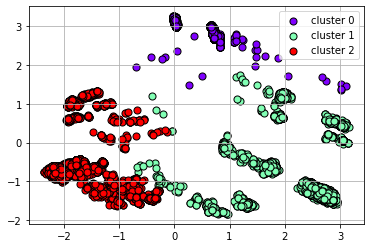

In [41]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np

pca_X_array = np.array(pca_X)

colors = mcm.rainbow(np.linspace(0, 1, OPTIMAL_K + 1))

# plot the clusters
for i in range(OPTIMAL_K + 1):   
    plt.scatter(
        pca_X_array[kprototype.labels_ == i, 0], pca_X_array[kprototype.labels_ == i, 1],
        s=50, c=[colors[i]], # warning if not array
        marker='o', edgecolor='black',
        label='cluster ' + str(i)
    )

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [42]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def subplot_3d_viz(fig, azim, elev, col_i):
    ax = fig.add_subplot(1, 3, col_i, projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.azim = azim  # default -60
    ax.elev = elev  # default 30

    for i in pca_X['cluster'].unique(): 
        ax.scatter(pca_X_array[kprototype.labels_ == i, 0], 
                   pca_X_array[kprototype.labels_ == i, 1], 
                   pca_X_array[kprototype.labels_ == i, 2], 
                   c=[colors[i]],
                   edgecolor='black',
                   label='cluster ' + str(i));

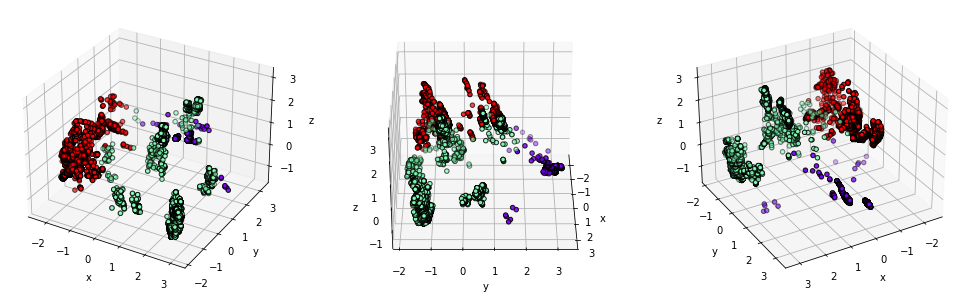

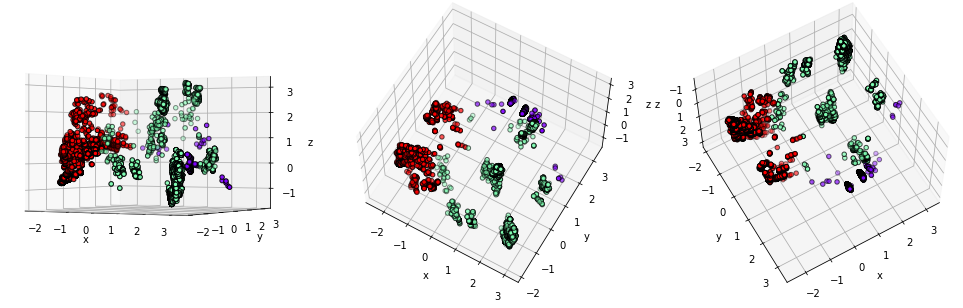

In [43]:
azims = [-60, 0, 60]
elevs = [0, 60, 240]

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(azims)):
    subplot_3d_viz(fig, azims[i], 30, i+1)

plt.show()

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(elevs)):
    subplot_3d_viz(fig, -60, elevs[i], i+1)

plt.show()

In [44]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'attacker_label', 'victim_label']

In [45]:
# join dfs
labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)
result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,cluster,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
0,2.85461,-1.51885,-0.02486,1.15601,-0.69080,-0.64057,-0.17632,-0.75084,-0.54877,0.36578,0.77812,0.73697,0.24560,0.30142,0.29413,0.19358,-0.11036,-0.53551,-0.45446,-0.04637,-0.04331,0.47885,-0.24134,-0.16119,0.90212,-0.01325,-0.21648,-0.30071,0.05082,-0.08246,0.19135,0.14818,0.26778,-0.00329,-0.01727,-0.13912,-0.03925,0.03547,-0.08647,-0.02050,0.03212,0.06722,-0.06202,0.03676,0.03041,0.02760,0.03625,0.00477,-0.01886,-0.05122,-0.00142,-0.02802,0.03857,-0.02340,0.01532,-0.02674,0.05063,0.06983,0.04027,-0.01429,-0.03395,-0.05349,0.05310,-0.03338,-0.02456,-0.02560,0.01558,0.01617,-0.00032,0.02246,0.02202,0.00613,-0.03060,-0.00468,-0.00559,0.03197,-0.02092,0.03487,0.00987,-0.02870,0.00979,-0.00303,0.01609,-0.01013,0.00760,0.00532,-0.00948,0.00049,-0.00543,-0.01231,0.01828,0.00392,0.01767,0.01086,-0.00425,0.00670,-0.02120,-0.02486,0.00878,0.00961,-0.01498,-0.00843,-0.01942,0.00129,-0.00436,0.00193,-0.00009,-0.01266,0.00014,0.00181,-0.00062,-0.00443,-0.00827,-0.01162,-0.00506,-0.00386,0.00136,-0.00207,0.00462,-0.00101,-0.00041,0.00112,-0.00073,0.00404,0.00169,0.00060,-0.00171,-0.00421,-0.00175,0.00137,0.00103,-0.00141,-0.00072,-0.00116,0.00055,0.00299,0.00015,-0.00033,0.00055,0.00035,-0.00083,0.00083,0.00011,-0.00080,0.00118,-0.00145,-0.00004,0.00021,0.00008,-0.00015,0.00015,0.00004,0.00021,0.00001,-0.00001,-0.00002,0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1,ChkgownwAvmzRR2b3,1.00000,192.168.10.17,0.07765,23.194.140.29,2017-07-06T12:11:10.551417Z,0.37105,117.50738,0.09062,tcp,ssl,RSTR,0.55712,36511,orig_reg_or_dyn,0.00639,1428,0.00003,32,0.00675,443,resp_443,0.00001,29315,0.00002,34,0.00000,0.00000,0.00000,1.00000,0.00000,No,No
1,2.92846,0.60636,-0.19784,-0.59187,1.93076,0.54925,1.52979,-1.01887,-0.53689,0.70274,-0.26095,0.96246,-0.54330,0.39170,-0.03475,0.22144,-0.63039,-0.45391,-0.08171

In [47]:
def print_df_func(df, col, func):
    if func == 'count':
        print(df[col].value_counts())
        print('')
    elif func == 'mean':
        col_mean = df[col].mean()
        print(str(col) + ' mean = ' + str(col_mean))
    elif func == 'median':
        col_median = df[col].median()
        print(str(col) + ' median = ' + str(col_median))
    elif func == 'min':
        col_min = df[col].min()
        print(str(col) + ' min = ' + str(col_min))
    elif func == 'max':
        col_max = df[col].max()
        print(str(col) + ' max = ' + str(col_max))
        print('')

In [48]:
plt.rcParams["figure.figsize"] = (10,7)

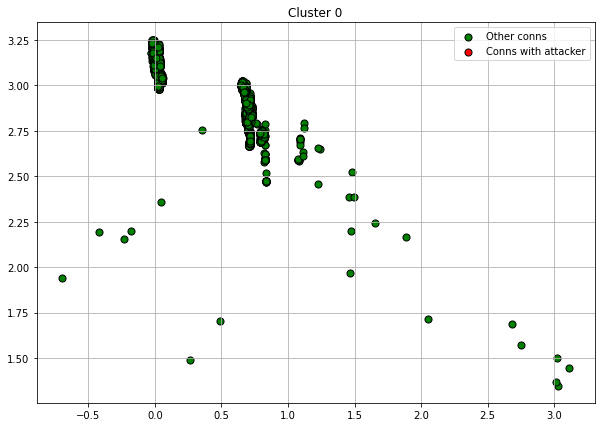

Total num of conns: 4353

Attacker conns ratio:
No    4353
Name: attacker_label, dtype: int64

IPs:
192.168.10.3    4353
Name: originated_ip, dtype: int64

192.168.10.1      4310
224.0.0.252         19
192.168.10.255      10
192.168.10.50        1
192.168.10.17        1
131.253.34.230       1
192.168.10.19        1
64.4.54.253          1
192.168.10.12        1
40.77.224.254        1
65.52.108.189        1
192.168.10.9         1
192.168.10.16        1
131.253.34.255       1
192.168.10.51        1
224.0.1.24           1
65.55.44.109         1
Name: responded_ip, dtype: int64

Cluster 0 OK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
19254,1.00000,192.168.10.3,0.74843,192.168.10.1,2017-07-06T12:21:10.399913Z,0.70512,0.06043,0.00005,udp,dns,SF,0.94779,62112,orig_reg_or_dyn,0.00018,40,0.00000,1,0.00079,53,resp_53,0.00000,139,0.00000,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
9957,1.00000,192.168.10.3,0.74843,192.168.10.1,2017-07-06T12:27:17.814517Z,0.90975,0.09141,0.00007,udp,dns,SF,0.94018,61613,orig_reg_or_dyn,0.00020,45,0.00000,1,0.00079,53,resp_53,0.00000,151,0.00000,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
3141,1.00000,192.168.10.3,0.74843,192.168.10.1,2017-07-06T12:25:11.970091Z,0.83966,0.03040,0.00002,udp,dns,SF,0.93054,60981,orig_reg_or_dyn,0.00021,47,0.00000,1,0.00079,53,resp_53,0.00000,79,0.00000,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
9886,1.00000,192.168.10.3,0.74843,192.168.10.1,2017-07-06T12:03:37.660989Z,0.11882,0.06005,0.00005,udp,dns,SF,0.94326,61815,orig_reg_or_dyn,0.00023,51,0.00000,1,0.00079,53,resp_53,0.00000,83,0.00000,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
16224,1.00000,192.168.10.3,0.74843,192.168.10.1,2017-07-06T12:20:01.515592Z,0.66676,0.06131,0.00005,udp,dns,SF,0.94204,61735,orig_reg_or_dyn,0.00020,45,0.00000,1,0.00079,53,resp_53,0.00000,98,0.00000,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
11725,1.00000,192.168.10.3,0.74843,192.168.10.1,2017-07-06T12:06:48.961147Z,0.22536,0.20460,0.00016,udp,dns,SF,0.94186,61723,orig_reg_or_dyn,0.00021,47,0.00000,1,0.00079,53,resp_53,0.00000,148,0.00000,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
3544,1.00000,192.168.10.3,0.74843,192.168.10.1,2017-07-06T12:13:01.063651Z,0.43260,0.06615,0.00005,udp,dns,SF,0.94868,62170,orig_reg_or_dyn,0.00020,45,0.00000,1,0.00079,53,resp_53,0.00000,225,0.00000,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
6950,1.00000,192.168.10.3,0.74843,192.168.10.1,2017-07-06T12:23:55.866653Z,0.79728,0.03135,0.00002,udp,dns,SF,0.95135,62345,orig_reg_or_dyn,0.00026,58,0.00000,1,0.00079,53,resp_53,0.00000,139,0.00000,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
5354,1.00000,192.168.10.3,0.74843,192.168.10.1,2017-07-06T12:12:57.854194Z,0.43081,0.00051,0.00000,udp,dns,SF,0.92489,60611,orig_reg_or_dyn,0.00040,89,0.00000,1,0.00079,53,resp_53,0.00000,167,0.00000,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
11402,1.00000,192.168.10.3,0.74843,192.168.10.1,2017-07-06T12:23:59.157317Z,0.79911,0.03084,0.00002,udp,dns,SF,0.95309,62459,orig_reg_or_dyn,0.00025,56,0.00000,1,0.00079,53,resp_53,0.00000,122,0.00000,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No


Protocol:
udp    4347
tcp       6
Name: protocol, dtype: int64

Service:
dns     4343
none       5
ssl        4
ntp        1
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    4334
orig_well_known      19
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            4309
resp_reg             19
resp_well_known      18
resp_443              6
resp_123              1
Name: resp_p_cat, dtype: int64




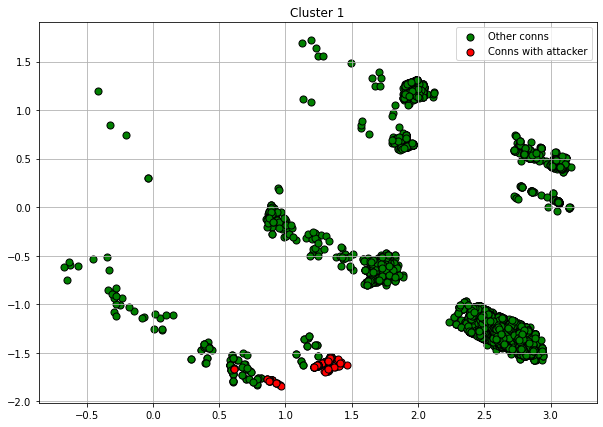

Total num of conns: 7369

Attacker conns ratio:
No     7065
Yes     304
Name: attacker_label, dtype: int64

IPs:
192.168.10.15    1773
192.168.10.17    1471
192.168.10.19     761
192.168.10.16     468
192.168.10.14     466
192.168.10.5      455
192.168.10.12     399
192.168.10.51     372
172.16.0.1        304
192.168.10.9      301
192.168.10.25     298
192.168.10.50     165
192.168.10.8      135
188.92.40.81        1
Name: originated_ip, dtype: int64

192.168.10.50     425
23.50.75.27       140
72.21.91.29       126
192.168.10.255    108
178.255.83.1       82
                 ... 
23.23.243.116       1
54.148.190.222      1
74.125.192.109      1
178.237.36.10       1
199.16.156.11       1
Name: responded_ip, Length: 1190, dtype: int64

Cluster 1 NOK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
14497,0.00000,172.16.0.1,0.74843,192.168.10.50,2017-07-06T12:25:24.14317Z,0.84644,5.88124,0.00454,tcp,none,SF,0.73351,48070,orig_reg_or_dyn,0.00000,0,0.00000,4,0.00121,80,resp_80,0.00000,0,0.00000,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
10267,0.00000,172.16.0.1,0.74843,192.168.10.50,2017-07-06T12:23:47.42578Z,0.79258,5.57417,0.00430,tcp,none,SF,0.71083,46584,orig_reg_or_dyn,0.00000,0,0.00000,4,0.00121,80,resp_80,0.00000,0,0.00000,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
9724,0.00000,172.16.0.1,0.74843,192.168.10.50,2017-07-06T12:26:47.741943Z,0.89300,5.30771,0.00409,tcp,none,SF,0.75314,49356,orig_reg_or_dyn,0.00000,0,0.00000,4,0.00121,80,resp_80,0.00000,0,0.00000,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
4066,0.00000,172.16.0.1,0.74843,192.168.10.50,2017-07-06T12:26:46.462425Z,0.89229,33.02840,0.02547,tcp,http,SF,0.75283,49336,orig_reg_or_dyn,0.19654,43951,0.00020,204,0.00121,80,resp_80,0.00002,72194,0.00007,105,0.00000,0.00000,1.00000,0.00000,1.00000,Yes,Yes
8709,0.00000,172.16.0.1,0.74843,192.168.10.50,2017-07-06T12:26:50.470399Z,0.89452,5.58058,0.00430,tcp,none,SF,0.75372,49394,orig_reg_or_dyn,0.00000,0,0.00000,4,0.00121,80,resp_80,0.00000,0,0.00000,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
20262,0.00000,172.16.0.1,0.74843,192.168.10.50,2017-07-06T12:29:06.468582Z,0.97026,5.61716,0.00433,tcp,none,SF,0.78561,51484,orig_reg_or_dyn,0.00000,0,0.00000,4,0.00121,80,resp_80,0.00000,0,0.00000,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
405,0.00000,172.16.0.1,0.74843,192.168.10.50,2017-07-06T12:27:27.181901Z,0.91496,5.87501,0.00453,tcp,none,SF,0.76235,49960,orig_reg_or_dyn,0.00000,0,0.00000,4,0.00121,80,resp_80,0.00000,0,0.00000,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
20208,0.00000,172.16.0.1,0.74843,192.168.10.50,2017-07-06T12:18:29.772799Z,0.61567,5.08880,0.00392,tcp,http,SF,0.67735,44390,orig_reg_or_dyn,0.00160,358,0.00000,5,0.00121,80,resp_80,0.00000,763,0.00000,5,0.00000,0.00000,1.00000,0.00000,0.01316,Yes,Yes
13177,0.00000,172.16.0.1,0.74843,192.168.10.50,2017-07-06T12:23:20.716624Z,0.77770,5.27714,0.00407,tcp,none,SF,0.70461,46176,orig_reg_or_dyn,0.00000,0,0.00000,4,0.00121,80,resp_80,0.00000,0,0.00000,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
13109,0.00000,172.16.0.1,0.74843,192.168.10.50,2017-07-06T12:24:30.794705Z,0.81673,5.21603,0.00402,tcp,none,SF,0.72094,47246,orig_reg_or_dyn,0.00000,0,0.00000,4,0.00121,80,resp_80,0.00000,0,0.00000,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes


Cluster 1 OK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
16804,1.00000,192.168.10.15,0.07481,23.11.224.29,2017-07-06T12:14:27.328595Z,0.48064,115.32427,0.08893,tcp,http,SF,0.76644,50228,orig_reg_or_dyn,0.00159,356,0.00002,17,0.00121,80,resp_80,0.00000,241,0.00001,15,0.00000,0.00000,1.00000,0.00000,0.00000,No,No
6366,1.00000,192.168.10.12,0.55856,144.217.148.73,2017-07-06T12:26:44.014478Z,0.89092,0.01596,0.00001,udp,ntp,SF,0.00183,123,orig_well_known,0.00021,48,0.00000,1,0.00186,123,resp_123,0.00000,48,0.00000,1,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
18196,1.00000,192.168.10.19,0.63331,163.172.10.212,2017-07-06T12:07:52.269191Z,0.26062,0.09708,0.00007,udp,ntp,SF,0.00183,123,orig_well_known,0.00021,48,0.00000,1,0.00186,123,resp_123,0.00000,48,0.00000,1,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
13436,1.00000,192.168.10.51,0.66976,172.217.12.142,2017-07-06T12:21:56.549888Z,0.73083,5.96630,0.00460,tcp,ssl,SF,0.76432,50089,orig_reg_or_dyn,0.00284,635,0.00001,8,0.00675,443,resp_443,0.00000,168,0.00000,6,0.00000,0.00000,0.00000,1.00000,0.00000,No,No
11319,1.00000,192.168.10.17,0.61054,157.240.2.25,2017-07-06T12:08:09.963087Z,0.27048,0.11695,0.00009,tcp,ssl,SF,0.59402,38929,orig_reg_or_dyn,0.00192,429,0.00001,14,0.00675,443,resp_443,0.00000,3924,0.00001,10,0.00000,0.00000,0.00000,1.00000,0.00000,No,No
8661,1.00000,192.168.10.15,0.71519,184.73.199.81,2017-07-06T12:25:09.668664Z,0.83838,0.17543,0.00014,tcp,ssl,SF,0.77700,50920,orig_reg_or_dyn,0.00456,1020,0.00001,7,0.00675,443,resp_443,0.00000,559,0.00000,7,0.00000,0.00000,0.00000,1.00000,0.00000,No,No
1397,1.00000,192.168.10.5,0.19111,52.84.37.55,2017-07-06T12:15:47.782045Z,0.52545,115.49266,0.08906,tcp,ssl,SF,0.75616,49554,orig_reg_or_dyn,0.00292,654,0.00003,28,0.00675,443,resp_443,0.00001,21876,0.00002,31,0.00000,0.00000,0.00000,1.00000,0.03947,No,No
17905,1.00000,192.168.10.17,0.81062,208.81.1.197,2017-07-06T12:29:25.034136Z,0.98060,0.04326,0.00003,udp,ntp,SF,0.00183,123,orig_well_known,0.00021,48,0.00000,1,0.00186,123,resp_123,0.00000,48,0.00000,1,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
7859,1.00000,192.168.10.15,0.50748,131.253.61.98,2017-07-06T12:06:38.798115Z,0.21970,0.24071,0.00019,tcp,ssl,SF,0.75526,49495,orig_reg_or_dyn,0.02620,5860,0.00001,14,0.00675,443,resp_443,0.00001,16832,0.00001,15,0.00000,0.00000,0.00000,1.00000,0.00000,No,No
945,1.00000,192.168.10.12,0.55856,144.217.148.73,2017-07-06T12:13:19.014398Z,0.44260,0.01678,0.00001,udp,ntp,SF,0.00183,123,orig_well_known,0.00021,48,0.00000,1,0.00186,123,resp_123,0.00000,48,0.00000,1,0.00000,0.00000,0.00000,0.00000,0.00000,No,No


Protocol:
tcp     5725
udp     1643
icmp       1
Name: protocol, dtype: int64

Service:
ssl                   2845
http                  1732
ntp                   1425
none                  1137
dns                    129
ssh                     32
ftp                     30
ftp-data                30
smb,gssapi,dce_rpc       9
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    5835
orig_well_known    1534
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           2978
resp_80            2614
resp_123           1425
resp_well_known     173
resp_reg            107
resp_22              34
resp_21              30
resp_dyn              8
Name: resp_p_cat, dtype: int64




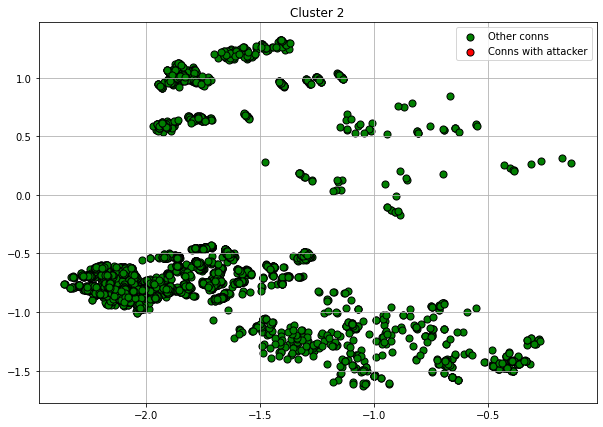

Total num of conns: 10154

Attacker conns ratio:
No    10154
Name: attacker_label, dtype: int64

IPs:
192.168.10.15    4342
192.168.10.17    1677
192.168.10.14     759
192.168.10.19     584
192.168.10.5      488
192.168.10.9      443
192.168.10.12     413
192.168.10.16     391
192.168.10.50     360
192.168.10.51     326
192.168.10.8      191
192.168.10.25     179
192.168.10.1        1
Name: originated_ip, dtype: int64

192.168.10.3    10154
Name: responded_ip, dtype: int64

Cluster 2 OK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
14851,1.00000,192.168.10.15,0.74843,192.168.10.3,2017-07-06T12:08:17.221925Z,0.27452,0.08625,0.00007,udp,dns,SF,0.86682,56806,orig_reg_or_dyn,0.00031,70,0.00000,2,0.00079,53,resp_53,0.00000,192,0.00000,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
6645,1.00000,192.168.10.15,0.74843,192.168.10.3,2017-07-06T12:12:27.805128Z,0.41408,0.00023,0.00000,udp,dns,SF,0.98779,64733,orig_reg_or_dyn,0.00030,66,0.00000,2,0.00079,53,resp_53,0.00000,278,0.00000,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
21415,1.00000,192.168.10.17,0.74843,192.168.10.3,2017-07-06T12:25:12.414084Z,0.83991,0.03153,0.00002,udp,dns,SF,0.49324,32325,orig_reg_or_dyn,0.00041,92,0.00000,2,0.00079,53,resp_53,0.00000,170,0.00000,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
16611,1.00000,192.168.10.14,0.74843,192.168.10.3,2017-07-06T12:14:59.377326Z,0.49849,0.03103,0.00002,udp,dns,SF,0.83490,54714,orig_reg_or_dyn,0.00036,80,0.00000,2,0.00079,53,resp_53,0.00000,200,0.00000,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
2153,1.00000,192.168.10.25,0.74843,192.168.10.3,2017-07-06T12:19:59.79282Z,0.66580,0.15105,0.00012,udp,dns,SF,0.81708,53546,orig_reg_or_dyn,0.00029,64,0.00000,2,0.00079,53,resp_53,0.00000,242,0.00000,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
7484,1.00000,192.168.10.17,0.74843,192.168.10.3,2017-07-06T12:11:07.764009Z,0.36950,0.06080,0.00005,udp,dns,SF,0.90026,58997,orig_reg_or_dyn,0.00027,60,0.00000,2,0.00079,53,resp_53,0.00000,264,0.00000,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
712,1.00000,192.168.10.15,0.74843,192.168.10.3,2017-07-06T12:10:23.978175Z,0.34511,0.00016,0.00000,udp,dns,SF,0.81589,53468,orig_reg_or_dyn,0.00030,66,0.00000,2,0.00079,53,resp_53,0.00000,180,0.00000,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
2604,1.00000,192.168.10.15,0.74843,192.168.10.3,2017-07-06T12:25:12.604358Z,0.84001,0.00020,0.00000,udp,dns,SF,0.85466,56009,orig_reg_or_dyn,0.00032,72,0.00000,2,0.00079,53,resp_53,0.00000,284,0.00000,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
14218,1.00000,192.168.10.17,0.74843,192.168.10.3,2017-07-06T12:04:10.884736Z,0.13733,0.00016,0.00000,udp,dns,SF,0.50107,32838,orig_reg_or_dyn,0.00039,88,0.00000,2,0.00079,53,resp_53,0.00000,188,0.00000,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
9372,1.00000,192.168.10.15,0.74843,192.168.10.3,2017-07-06T12:10:10.481059Z,0.33760,0.03255,0.00003,udp,dns,SF,0.94055,61637,orig_reg_or_dyn,0.00032,72,0.00000,2,0.00079,53,resp_53,0.00000,328,0.00000,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No


Protocol:
udp     9894
tcp      255
icmp       5
Name: protocol, dtype: int64

Service:
dns                9571
ntp                 167
none                137
krb                 120
krb_tcp             110
dce_rpc              34
krb,smb,gssapi       11
smb,gssapi            2
ntlm,gssapi,smb       2
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    9969
orig_well_known     185
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            9557
resp_well_known     393
resp_123            167
resp_dyn             20
resp_reg             17
Name: resp_p_cat, dtype: int64




In [49]:
for i in range(OPTIMAL_K + 1):
    result_cluster = result.loc[result['cluster'] == i]
    nok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] == 'Yes')]
    ok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'No') | ((result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] != 'Yes'))]
      
    plt.scatter(
        ok_conns[0], ok_conns[1],
        s=50, c='green',
        marker='o', edgecolor='black',
        label='Other conns'
    )
    
    plt.scatter(
        nok_conns[0], nok_conns[1],
        s=50, c='red',
        marker='o', edgecolor='black',
        label='Conns with attacker'
    )
    
    plt.legend(scatterpoints=1)
    plt.title('Cluster ' + str(i))
    plt.grid()
    plt.show()
    
    print('Total num of conns: ' + str(result_cluster.shape[0]) + '\n')
    
    
    print('Attacker conns ratio:')
    print_df_func(result_cluster, 'attacker_label', 'count')
    
    print('IPs:')
    print_df_func(result_cluster, 'originated_ip', 'count')
    print_df_func(result_cluster, 'responded_ip', 'count')

    if len(nok_conns) > 0:
        print('Cluster ' + str(i) + ' NOK sample connections:')
        samples = nok_conns.sample(15 if len(nok_conns) >= 15 else len(nok_conns))
        samples = samples.filter(INTERPRETATION_COLS[1:], axis=1)
        display(samples)
    
    if len(ok_conns) > 0:
        print('Cluster ' + str(i) + ' OK sample connections:')
        samples = ok_conns.sample(15 if len(ok_conns) >= 15 else len(ok_conns))
        samples = samples.filter(INTERPRETATION_COLS[1:], axis=1)
        display(samples)
        
    print('Protocol:')
    print_df_func(result_cluster, 'protocol', 'count')
    
    print('Service:')
    print_df_func(result_cluster, 'service', 'count')
    
    print('Orig_p_cat:')
    print_df_func(result_cluster, 'orig_p_cat', 'count')
    
    print('Resp_p_cat:')
    print_df_func(result_cluster, 'resp_p_cat', 'count')
    
    print('  ================================================  \n')
    

## Interpretation

Parallel coordinates plots.

In [50]:
features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                     'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

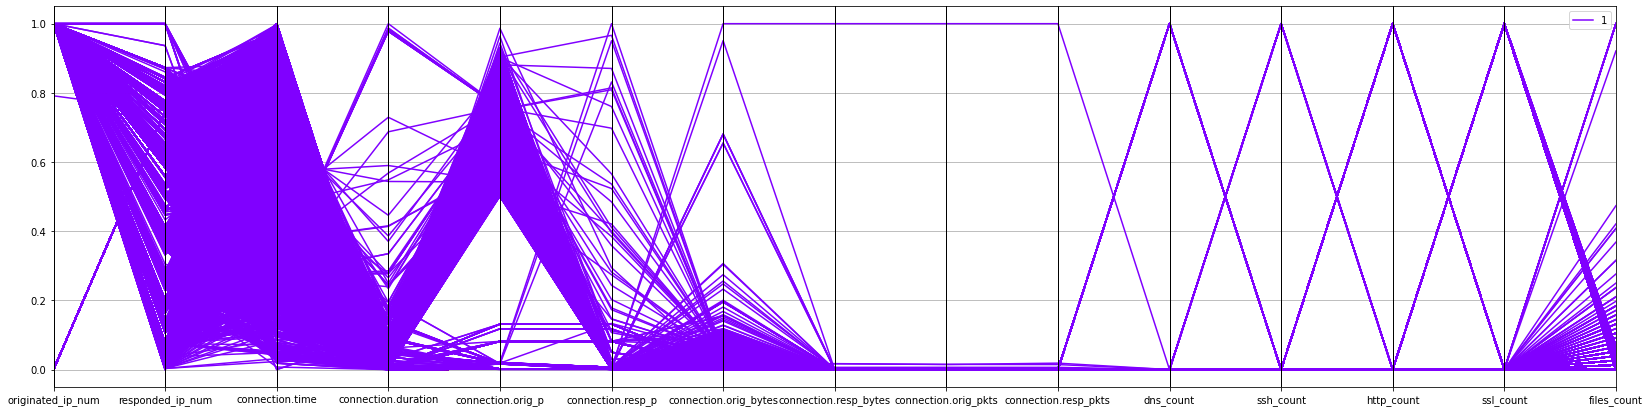

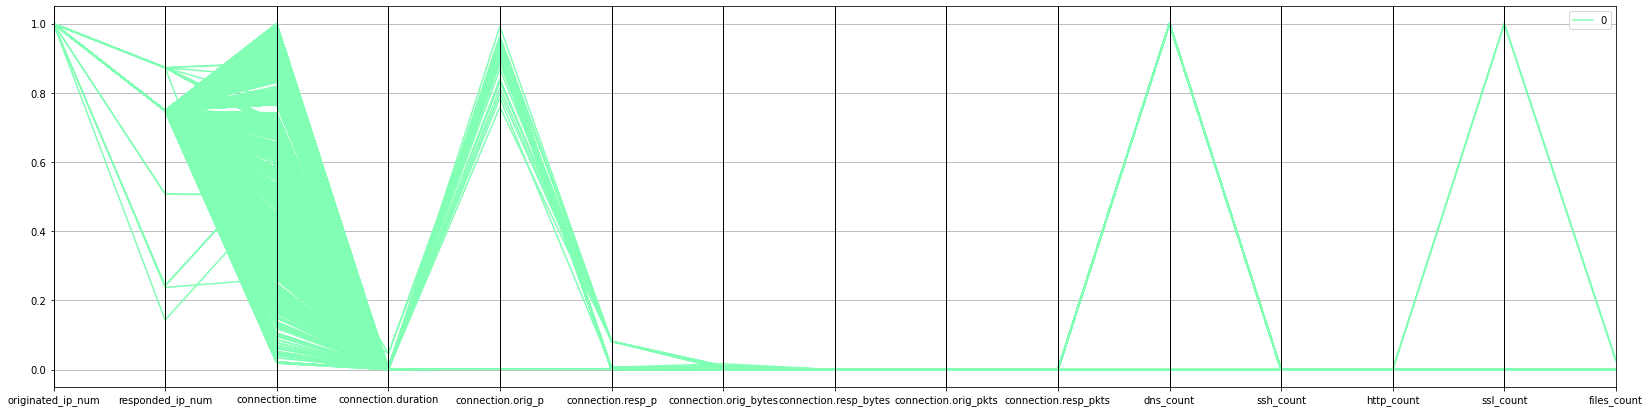

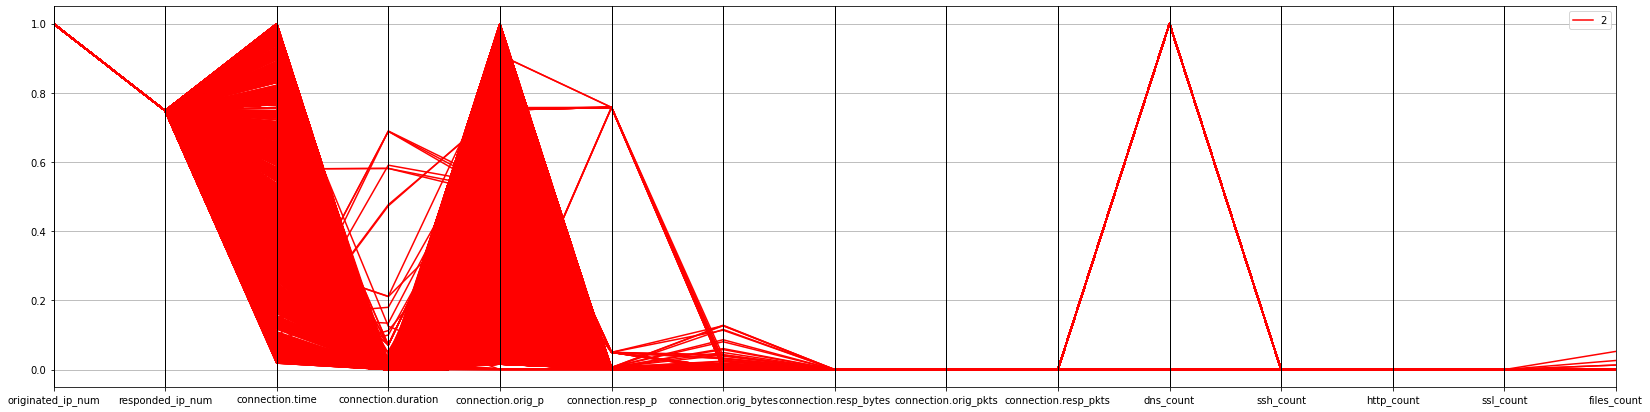

In [51]:
import pandas as pd

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (28,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()

With dominant neighbourhood:

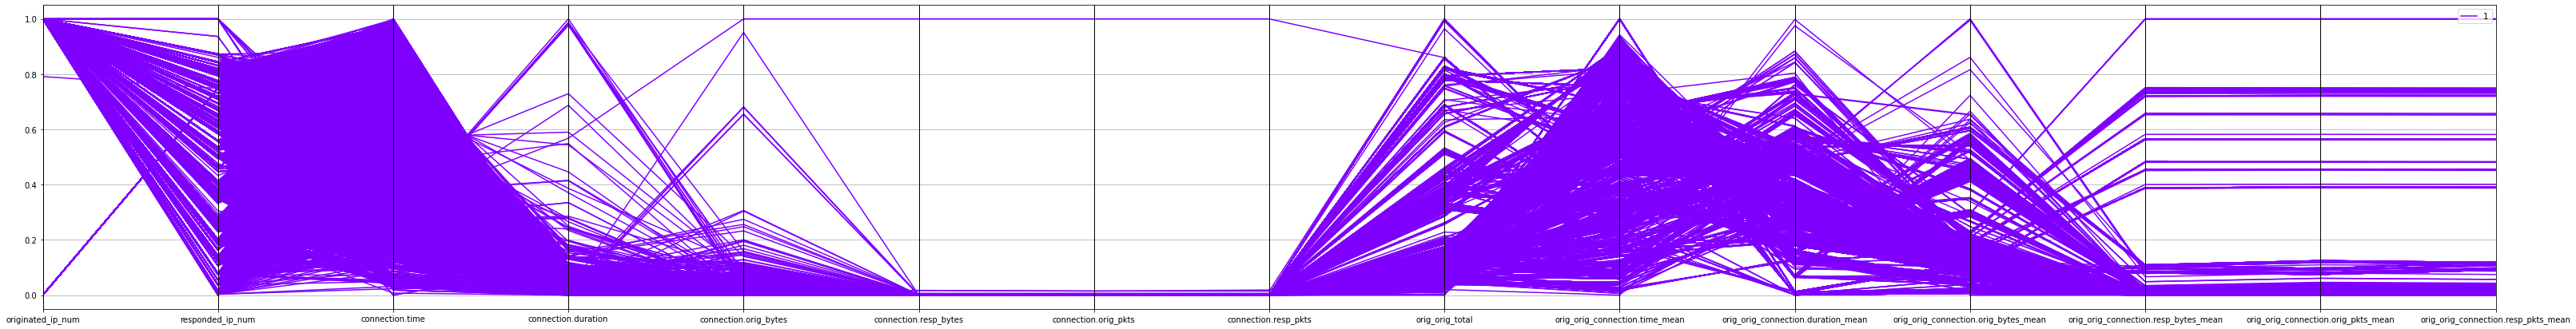

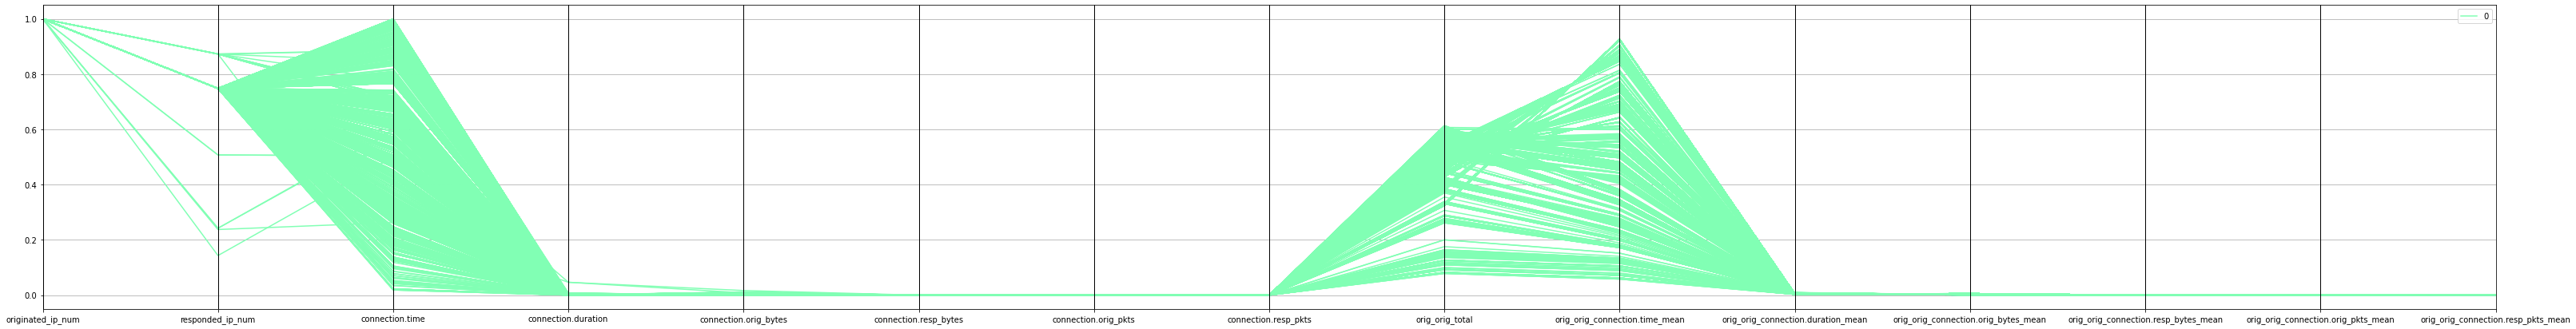

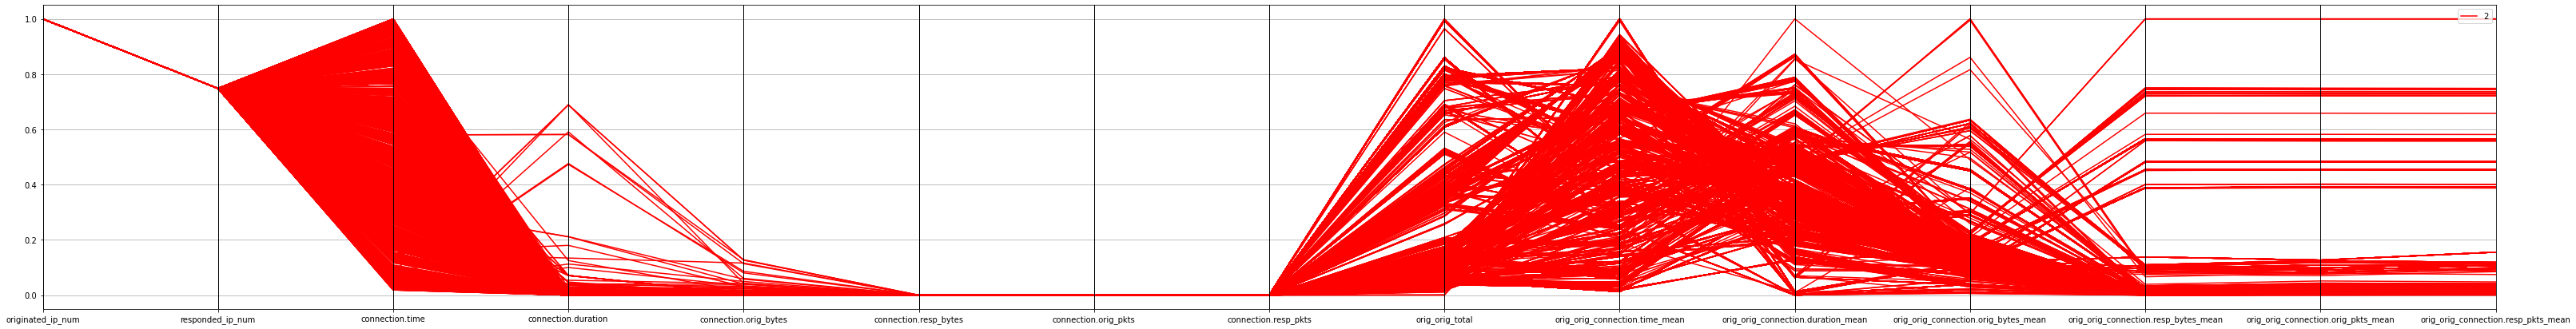

In [52]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean',
                       'attacker_label', 'victim_label']

labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)

features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     #'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                        'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.resp_pkts_mean']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (55,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()